In [814]:
#Importing libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [815]:
#Reading dataset.
data = pd.read_csv("housing.csv")
#Printing data
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [816]:
#Data Exploration.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [817]:
#Dropping NaN values and saving 
data.dropna(inplace=True)

In [818]:
#Splitting dataset into training and testing models.
from sklearn.model_selection import train_test_split
#defining x & y
x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value'] 

In [819]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [820]:
train_data = X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
12676,-121.42,38.56,21.0,2066.0,748.0,2548.0,734.0,1.3571,INLAND,55000.0
19691,-121.62,39.12,35.0,2787.0,587.0,1431.0,601.0,2.5469,INLAND,65900.0
8228,-118.19,33.77,35.0,1574.0,603.0,820.0,514.0,1.2321,NEAR OCEAN,137500.0
1158,-121.53,39.53,35.0,1806.0,293.0,683.0,295.0,4.5156,INLAND,91200.0
4417,-118.26,34.08,45.0,2174.0,627.0,1992.0,557.0,2.5428,<1H OCEAN,167800.0
...,...,...,...,...,...,...,...,...,...,...
3983,-118.63,34.18,32.0,1646.0,242.0,697.0,233.0,6.6689,<1H OCEAN,433000.0
11318,-117.99,33.77,15.0,2081.0,531.0,1617.0,561.0,3.4955,<1H OCEAN,160900.0
7820,-118.11,33.91,36.0,1088.0,231.0,617.0,211.0,3.8824,<1H OCEAN,193100.0
17047,-122.29,37.48,15.0,5480.0,892.0,2009.0,831.0,7.4678,NEAR OCEAN,500001.0


In [821]:
#fitting to a normal distribution
train_data['total_rooms'] = np.log(train_data['total_rooms'] +1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] +1)
train_data['population'] = np.log(train_data['population'] +1)
train_data['households'] = np.log(train_data['households'] +1)
train_data['median_income'] = np.log(train_data['median_income'] +1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

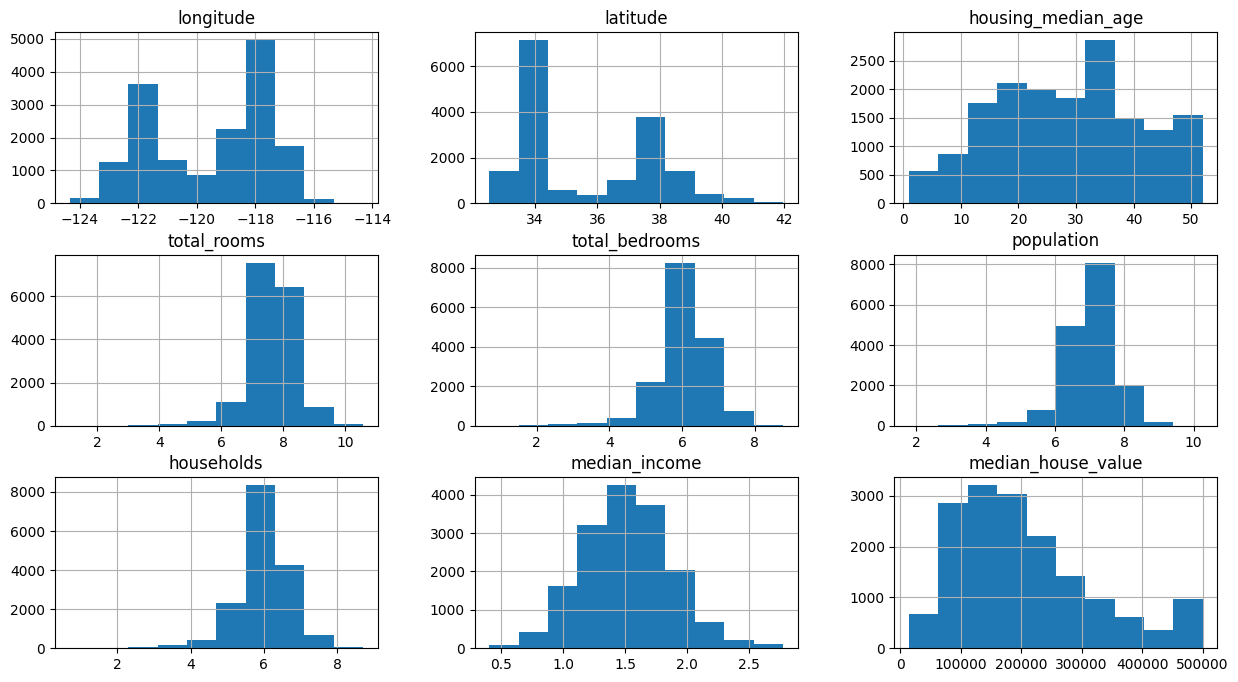

In [822]:
train_data.hist(figsize=(15,8))

In [823]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7254
INLAND        5195
NEAR OCEAN    2084
NEAR BAY      1810
ISLAND           3
Name: count, dtype: int64

In [824]:
#One-hot encoding the ocean_proximity column to use in training.
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis = 1)

<Axes: >

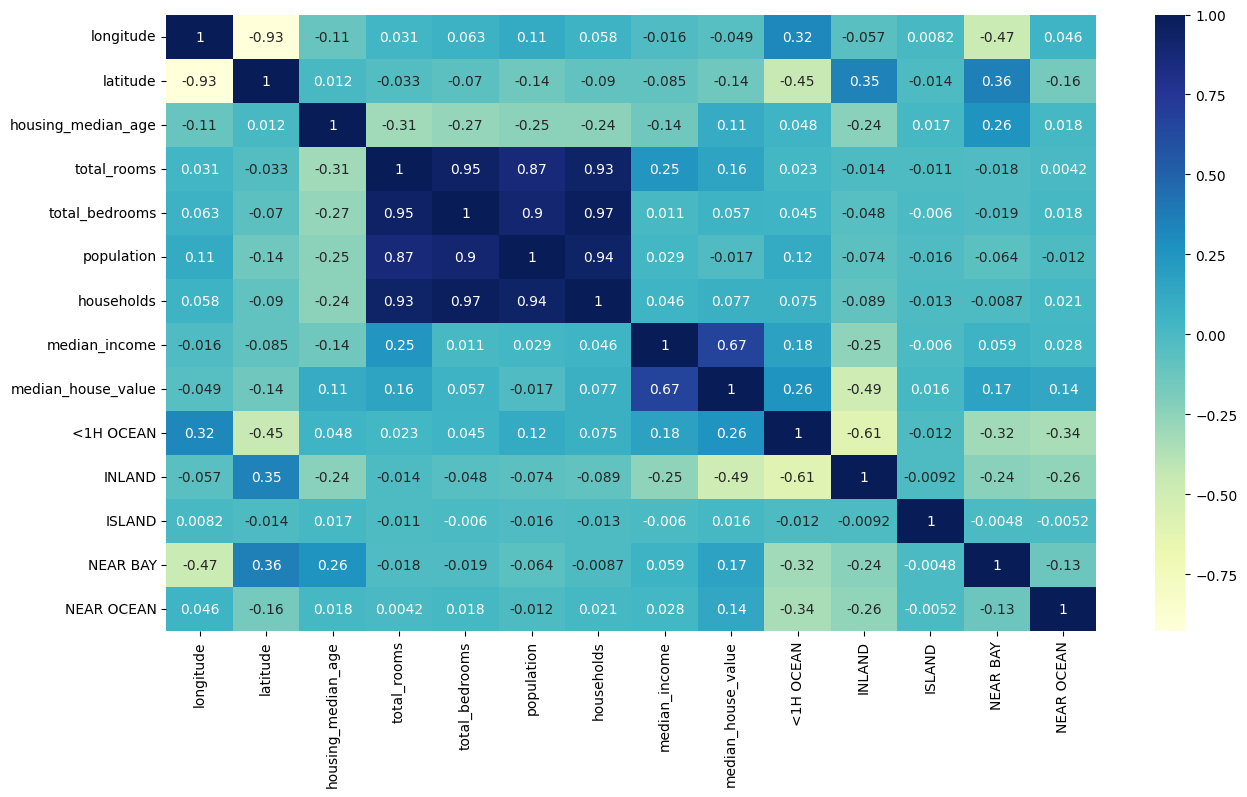

In [825]:
#Plotting deatmap of the dataset to find the correlation within dataset.
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

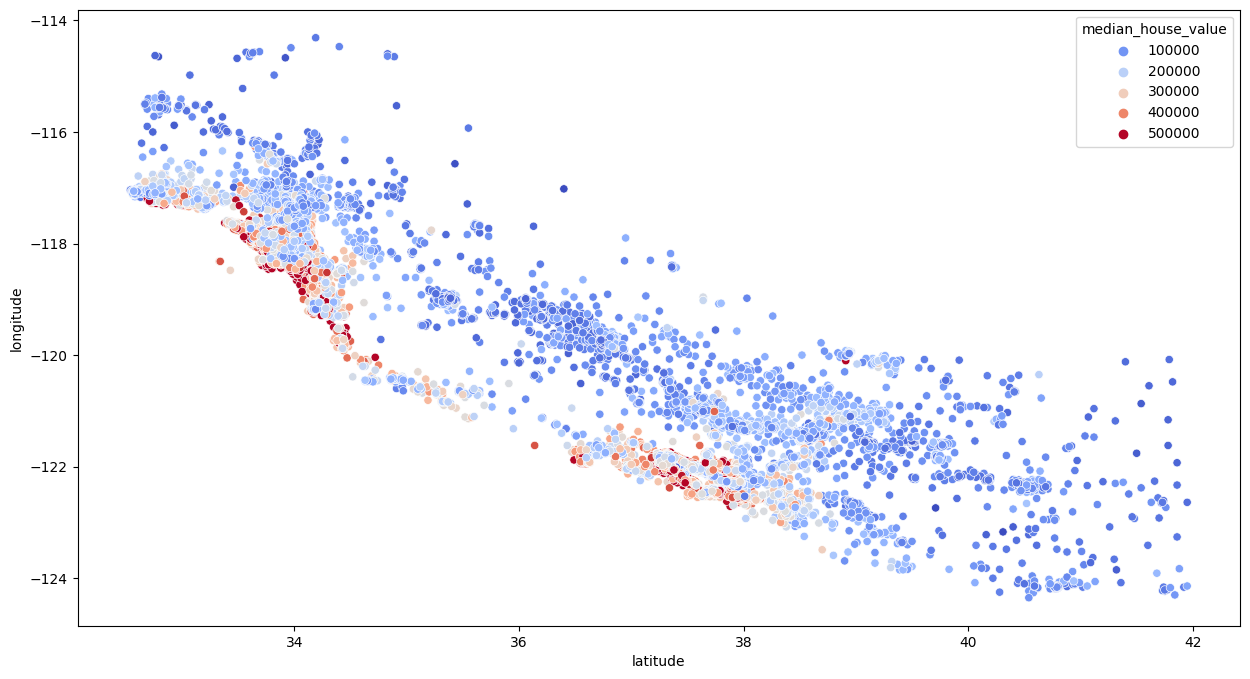

In [826]:
#Feature engineering.
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y = "longitude", data=train_data, hue="median_house_value",palette="coolwarm")

<Axes: >

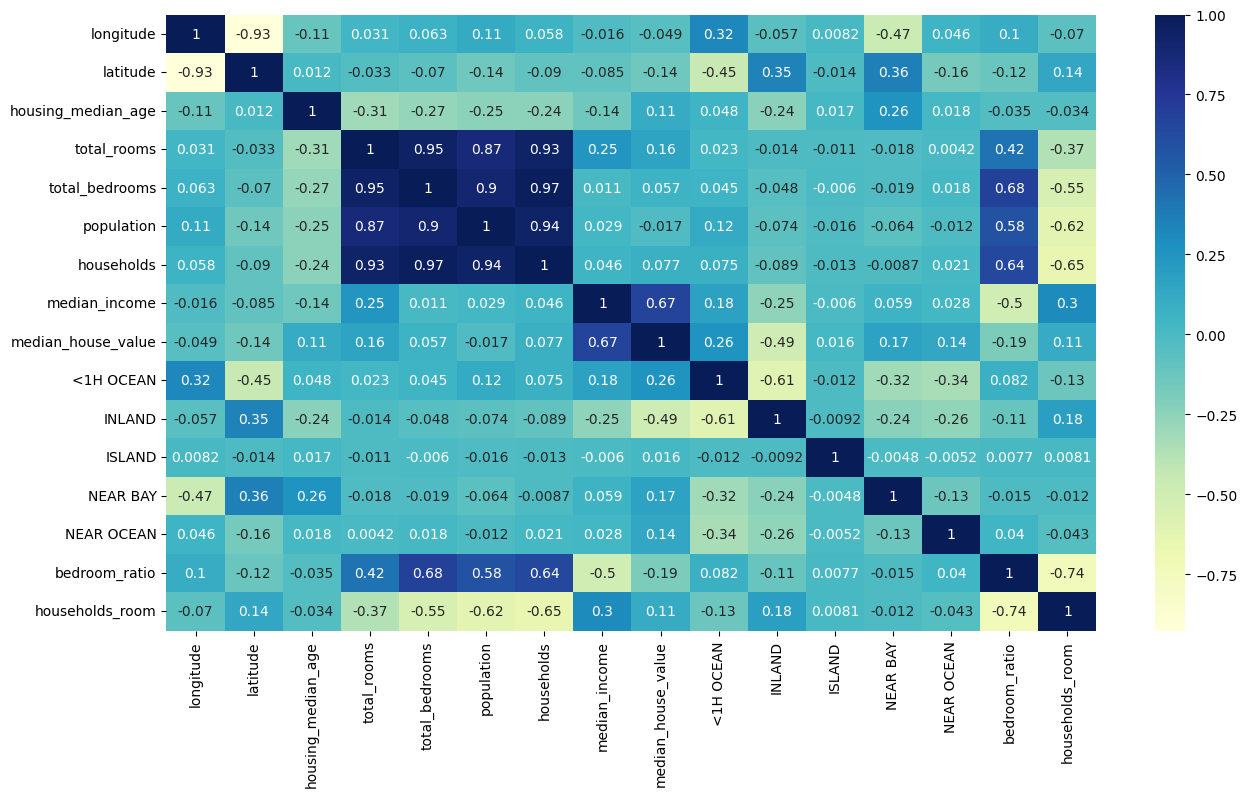

In [827]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['households_room'] = train_data['total_rooms']/train_data['households']
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot= True, cmap="YlGnBu")

In [828]:
#Training model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train, y_train= train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()
reg.fit(X_train_s, y_train)


LinearRegression()

In [829]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] +1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] +1)
test_data['population'] = np.log(test_data['population'] +1)
test_data['households'] = np.log(test_data['households'] +1)
test_data['median_income'] = np.log(test_data['median_income'] +1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis = 1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['households_room'] = test_data['total_rooms']/test_data['households']


In [830]:
X_test, y_test= test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [831]:
X_test_s = scaler.transform(X_test)

In [832]:
reg.score(X_test_s, y_test)

0.6342456120523801

In [833]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [834]:
forest.score(X_test, y_test)

0.8186234546429658

In [837]:
from sklearn.model_selection import GridSearchCV
forest = RandomForestRegressor()
param_grid = {
    "n_estimators": [100,200,300],
    "min_samples_split": [2,4],
    "max_depth": [None, 4, 8]
}
grid_search = GridSearchCV(forest, param_grid, cv=5,scoring= "neg_mean_squared_error", return_train_score=True)
grid_search.fit(X_train_s, y_train)

In [ ]:
best_forest = grid_search.best_estimator_

In [ ]:
best_forest.score(X_test_s, y_test)

0.8187497341021025